# Heart Disease Prediction Using Various Machine Learning Techniques
We would be working with the heart disease prediction data that is found in UCI repository. Below is an actual link of the data that we would be working. We would be exploring various machine learning techniques that could be used for predictions and gain a good understanding of them by taking into consideration some of the important metrics such as accuracy, precision and recall. There are other metrics that are also present and are important that we would be exploring and which could be seen at the end of the project. <br><br>https://www.kaggle.com/johnsmith88/heart-disease-dataset<br>

We see that there are some features that we would be considering for the machine learning model. Some of the actual features that we would be considering are as follows:-
1. age 
2. sex 
3. chest pain type (4 values) 
4. resting blood pressure 
5. serum cholestoral in mg/dl 
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved 
9. exercise induced angina 
10. oldpeak = ST depression induced by exercise relative to rest 
11. the slope of the peak exercise ST segment 
12. number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

We would be limiting ourselves to work with small dataset so that we gain an understanding of the overall workflow of machine learning. Once we gain a good understanding of the workflow of machine learning, we can explore other datasets and follow the same procedure for datasets that are large as the process stays the same. 




In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                                                           #This is used for data visualization
#Below are the libraries for evaluation of classification machine learning models
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, log_loss 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler                                #Used for standarization of input features 
from sklearn.svm import SVC                                                     #Support Vector Machine Model 
from sklearn.preprocessing import Normalizer                                    #Used for normalization of input features
from sklearn.linear_model import LogisticRegression                             #Logistic Regression Model 
from sklearn.naive_bayes import GaussianNB                                      #Gaussian Naive Bayes Model
from sklearn.ensemble import RandomForestClassifier                             #Random Forest Classifier Model 

## Reading the data
We would be first reading the data before we implement the operations. We would read a data that is simple to understand and contains minimal features. Since our data is stored in Data folder, we would have to manually type it as we are not working in that directory. We have to move one step away from the directory to the data folder and then, we have to read the values present in heart.csv file. We would be using pandas library which is great for reading data and files such as csv and excel. 

In [83]:
df = pd.read_csv('Data/heart.csv')               #Used for reading the dataframe 

## Printing the head of the data
We would now be looking at the dataframe that we have just read and stored in df. We would first check the first 5 rows just to make sure that we are working well with the data and get a feel of it. We see that there are 13 features in the data and the 14th feature is the target variable that we would have to predict later while performing machine learning operations. The head() would give us the first 5 rows in the dataframe. 

In [84]:
df.head()                        #Used for printing the head of the dataframe 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Getting the information 
One might have a question about whether the dataframe is complete. We have info() which comes to the rescue. This would give total number of non-null values for all features in the dataset and also their type.  We have considered a dataframe that is very simple to analyze and process for the sake of understanding and implementing the machine learning models. Therefore, we have a dataset that does not contain any null values as can be seen below. In real life, however, there is a lot of processing of data to be done before we can get it to this format without null values and in the form of mathematical vectors. We see that there are 303 entries or datapoints that we would be working on and performing machine learning operations. 

In [85]:
df.info()      #Getting the info of the dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Understanding how the data is spread
In addition to the above operation performed, we also have to see how the values are spread out in the form of mathematical vectors to get a solid understanding of the data. We have to observe the mean and standard deviation (std). Moreover, we also must get to know the minimum and maximum values for every feature that we are considering at this point. Therefore, we would be using describe() which would give us all the above values for all the features that we have considered. I just used 'T' after describe just to make it easy for us to read the table and get to know the features well. It is not mandatory to use 'T' after describe(). <br>
We see that there are a few categorical features that are represented as mathematical vectors rather than having those categories. It is due to the fact that machine learning algorithms does not process the information in the form of text. We have to always ensure that when we are giving the input to machine learning algorithms, we have to convert all the features in the form of mathematical vectors. <br>
Some of the interesting features present in the dataset are age and cholestrol. In general, we see that those who are old and have high cholestrol levels have a higher chance of getting heart diseases. It need not be true always but for the most part, that is what is assumed. Therefore, we can say that just by looking at the features and the values present in them, we might be able to understand how the machine learning algorithms would lay their emphasis on these features. 

In [86]:
df.describe().T         #Used for understanding the spread in the data

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Countplot for output variable 'Target'
We would be using seaborn which is a library in python that is mostly used for amazing visualizations and plots. There is an other library called matplotlib but it is pretty much limited in terms of its functionality. Moreover, some of the plots might not look so appealing to the observer. Thus, we would be sticking on towards seaborn plots. We would be using the most used plot type called countplot. We would consider one feature which is 'target' and we would count the total count for each category in the feature. Since there can only be 2 categories with one being having a heart disease and the other being not having a heart disease, we get just 2 bars and their count for each category in that feature. We see that there are more people who have a heart disease in the dataset than those who didn't have a heart disease. It is always good to draw plots and understand the data rather than represent those data points in the form of tables or mathematical values. We set the value of x to be target variable and the y is atomatically made equal to count since we are using the countplot. 

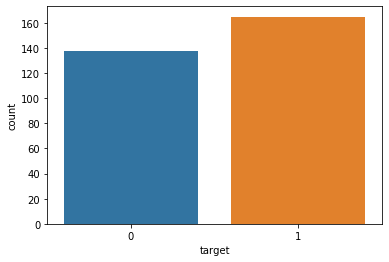

In [87]:
sns.countplot(df['target'])

## Countplot for feature 'Sex'
In a similar way, we would also be considering the feature 'sex' and count the number for each categorical feature. In addition to the one that we did above, we are going to make a small change here. We would also be using hue = 'target'. What this does for each categorical value in a feature, it would also divide those on the basis of whether they are targets or not. Therefore, we would also get the total count per category for the 'sex' feature. In addition to this, we would also get divided bars showing the hue as 'target'. We observe from the data that out of the dataset, we could find that most of the females had heart disease. In addition, we could also find that there are more number of men selected in the dataset than there were women. We could also observe that out of the male category, majority of men did not have heart disease. Therefore, we were able to better understand our data distribution with the help of countplot and also use additional feautures of it such as hue. There is a legend created as we used the hue as 'target'. 

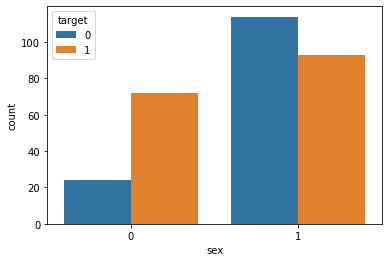

In [88]:
sns.countplot(data = df, x = 'sex', hue = 'target')

## Heatmap to understand correlation
Here comes the most interesting part. We see below a heatmap which is nothing but a correlation matrix which is depicted in a graphical way. One of the most important things that we need to find in our dataset is whether some of the features are correlated with each other. If most of the features are correlated with each other, there is no need to add all those feautres but just one feature representing them all. This would ensure that the time it takes to run the machine learning algorithms would reduce and would improve the efficiency of the code. Thus, we have to consider the correlation matrix and plot it using some seaborn plots such as heatmap just to get an understanding of the data. <br>
The first line is basically used in order to set the size of the plot that we would be taking into consideration. I tried not using line 1 just to see how the plot looks on the notebook. I could find that the plot was quite small and thus thought of adding the first line and arrange the size of the plot. <br> 
In line 2, we have the heatmap and we have to drop the feature 'target' as it is no longer needed for plotting a heatmap. After we drop that value, we have to get the correlation and we did that using corr(). Moreover, we have to plot the heatmap and get the annotations of them so that it becomes easier for us to understand and learn from the plot. Thus, annot is set to true so that we get those correlation values for different set of features. <br>
In heatmap, we see a diagonal line which have value 1. We can say that those values are highly correlated. Basically, if we compare same features, we see that they should be correlated. That is why we have the white diagonal line. One important thing to mention is that there is a scale just beside the heatmap. The higher the correlation, the lighter would be the color of the box. <br> 
From the heatmap, we see that thalach and slope features are correlated. In addition, we also find that there is a correlation between cp and thalach. Moreover, we also see that there is a good correlation between oldpeak and exang. All the remaining features are not as correlated as the features above. Even the features that we considered as correlated are not as correlated as to consider them to be dependent of each other. Therefore, we do not get the freedom to drop features as every feature is important and independent of each other. 

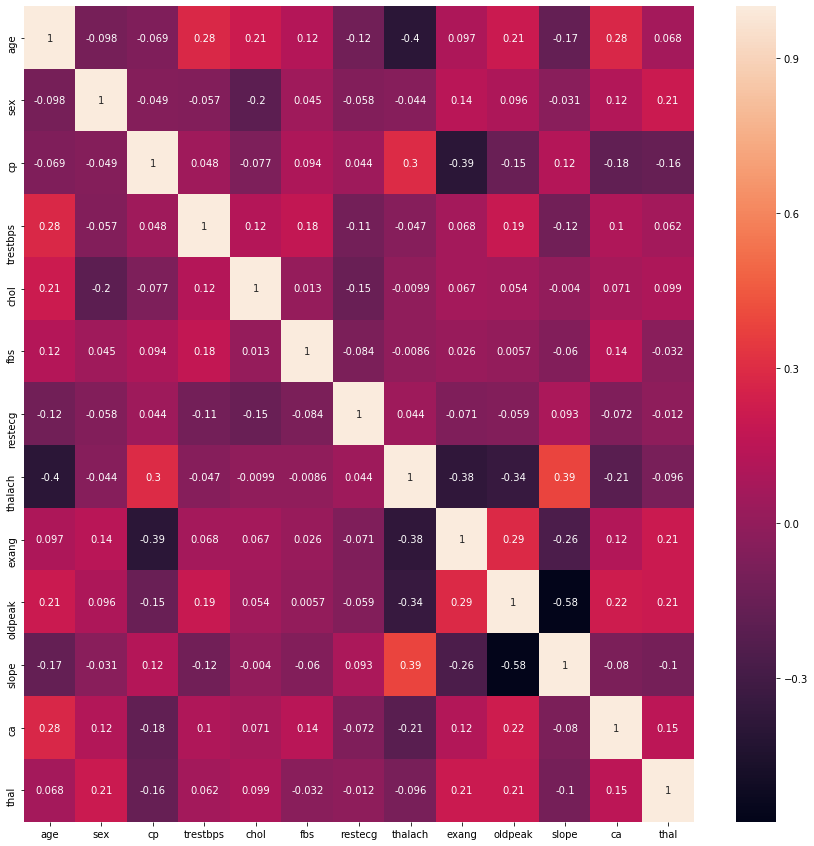

In [89]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.drop(['target'], axis = 1).corr(), annot = True)

## Regression plot for features 
Since we see in the above diagram that there is a negative correlation between features age and thalach, let us plot and understand how the relation actually is using the seaborn's regression plot feature. <br>
We understand that there is a downward direction regression line as the correlation is negative. Therefore, we can come to an understanding that in our dataset, as the value of thalach decreases, there would an increase in age or vice-versa. One thing to keep in mind is that correlation is not equal to causation. What this means is that having a lower age does not cause thalach to be more or vice-versa. It is one of the most important distinction that one must understand. 

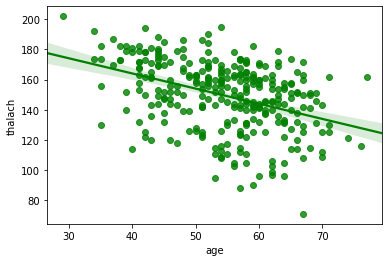

In [90]:
sns.regplot(x = 'age', y ='thalach', data = df, color = 'green')

We would once again be checking the head of our dataframe just to get to know the features and the values associated with them. It is really useful to check in between just to see the type of values present per feature. This is a tool to keep in handy whenever needed. 

In [91]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Pairplot for the data points 
Seaborn also has pairplot which would gives us the relationships between a different combinations of features and plot them all together so that an observer can understand the overall relationship between different set of features. For the time being, we just restricted ourselves to taking just a few features that are not categorical. We took features such as age, trestbps, chol, thalach, oldpeak and target as these values has a bit of a high variance (spread of values) in our dataset. One more thing to mention is there is an option in seaborn called palette which would allow us to customize our colors for the plots. One can check them out in seaborn documentation. 

C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


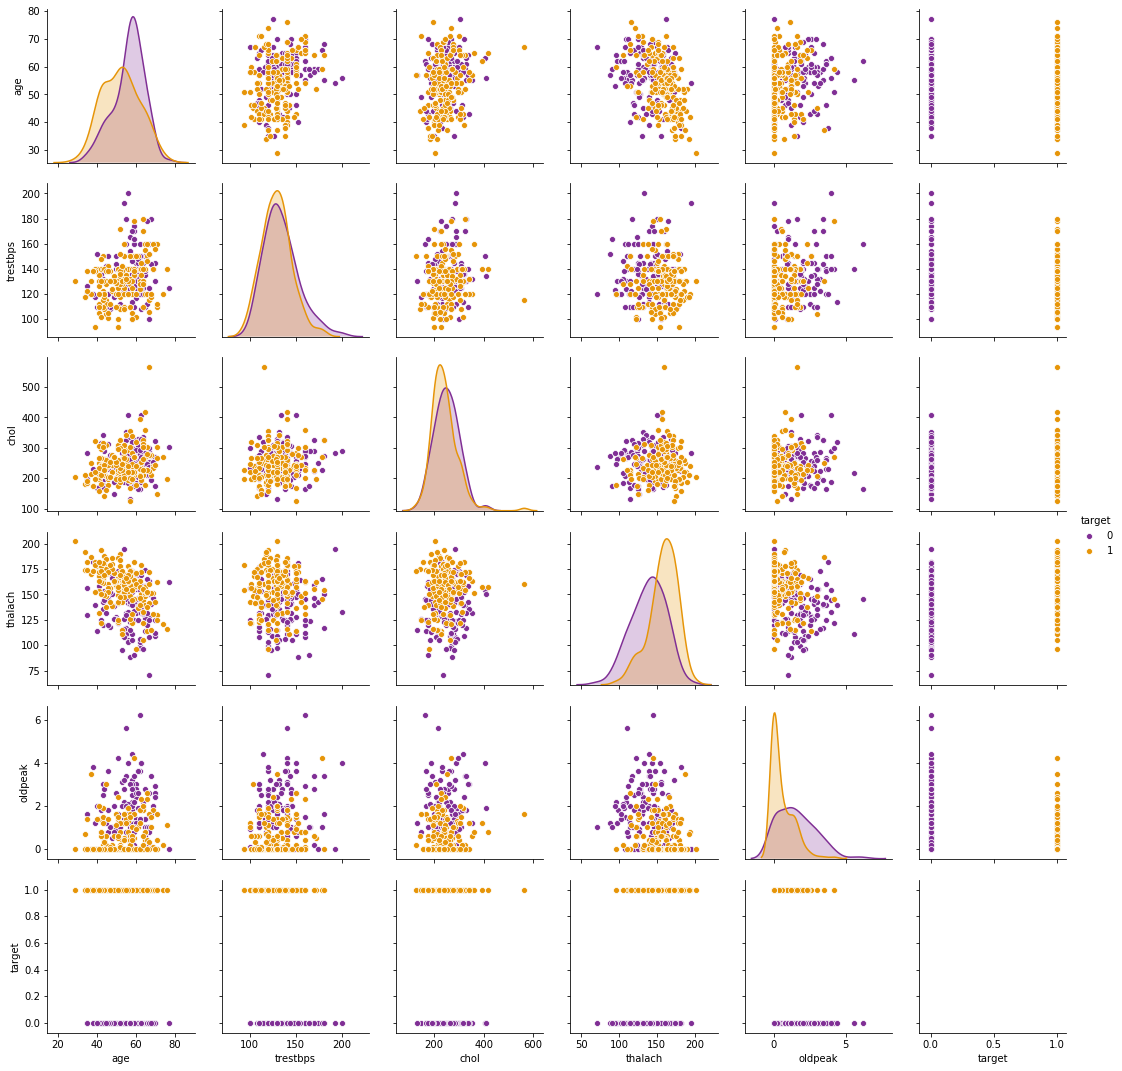

In [92]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue = 'target', palette = 'CMRmap')

## Regression plot for features 
We also saw in the pairplot that there was a good correlation but not signifcant correlation between age and cholestrol. One of the most useful observations is that when we consider the plot between age and cholestrol, we tend to find that there is a positive correlation between them. What this means is that when we try to consider the points, we would be able to draw a regression line that has a positive slope. One thing to keep in mind again is that correlation is not equal to causation. Therefore, having a higher cholestrol does not cause people to be of higher age and vice-versa. There might be a correlation in many graphs but that does not always mean that correlation equals causation in the datasets. 

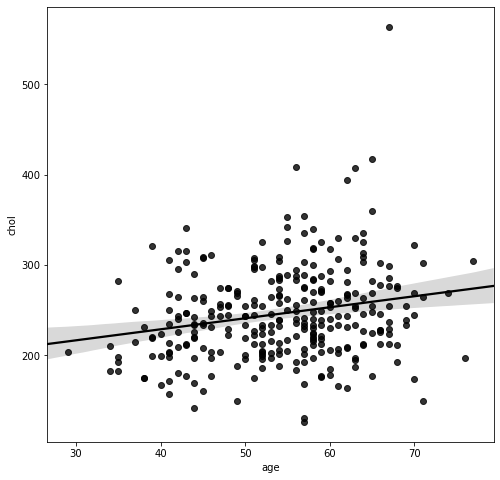

In [93]:
plt.figure(figsize = (8, 8))
sns.regplot(data = df, x = 'age', y = 'chol', color = 'black')

We would once again be using the head() just to check the top 5 rows of the dataframe and get an idea about the features that are present in them. 

In [94]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Boxplot for feature 'Cholestrol' 
One of the most useful plots in seaborn is boxplot which would give us the spread of the values in particular numerical feautures that we are interested to work in the dataset. We see some useful features to consider that could be used for the boxplots. One such feature in the dataset is cholestrol. We see how the feature cholestrol has values that are spread about the mean. <br>
We can see from the boxplot that there is a right shift in the values as can be seen from the box of the boxplot. The start of the box and the end of the box signify the 25th percentile and the 75th percentile values in the plot. We also see that somewhere around the cholestrol values of 350 or above, there are some points which are considered to be outliers. Outliers are points that are way below or above the standard deviation of the dataset. 

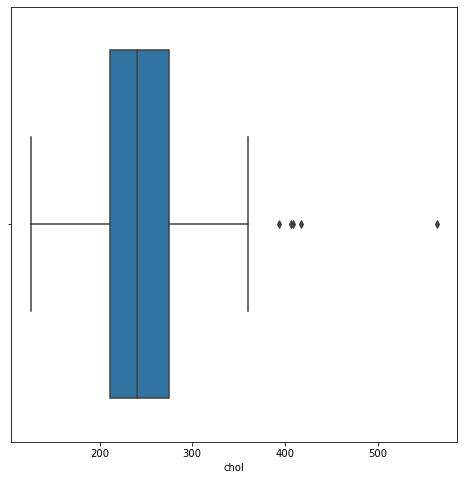

In [95]:
plt.figure(figsize = (8, 8))
sns.boxplot(data = df, x = 'chol')

## Boxplot for feature 'Thalach'
We would also be studying another feature in the dataset which is 'thalach'. We see from the boxplot that the values of thalach are more spread toward the left. We have a mean of about 150 (the line in the center of the box). We see the 25th percentile values are somewhere around 130 while the 75th percentile values are about 170. There is an outlier at the beginning of the box which is lower than a value of 80. In addition, there is a maximum point which is about 200 in the dataset as can be seen from the right outer edge of the boxplot. 

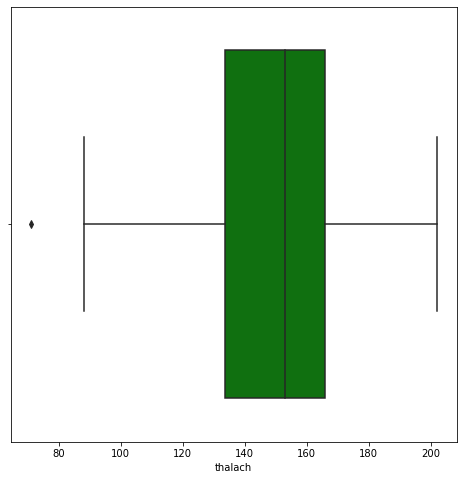

In [96]:
plt.figure(figsize = (8, 8))
sns.boxplot(data = df, x = 'thalach', color = 'green')

## Boxplot for feature 'Age'
We always consider age in real life for some of the important medical applications as it could be one of the factors that could be a dealbreaker. Thus, we would be looking at age which is an important feature that we must be considering right now. I just used different colors for different boxplots so that there is no confusion about the features that were used in the boxplots. We see that the average age of the people who are present in the dataset is about 56 years (approx). In addition to this, the 25th percentile age is about 48 years while the 75h percentile age is about 62 years. We also see that the minimum age that we consider in our dataset is about 30 years of age while the maximum age that we have considered is about 80 years (approx) as signified by the outer edges of the boxplot. <br>
This data is typical of the real world dataset that we must be considering for the application. We generally don't see young people suffering from heart disease as can be seen from the boxplot in our dataset. Most of the age ranges who would have a heart disease would be from 50 to 60 years of age. When we plot the boxplot, we could see that most of the values are typical of the actual real world scenario. 

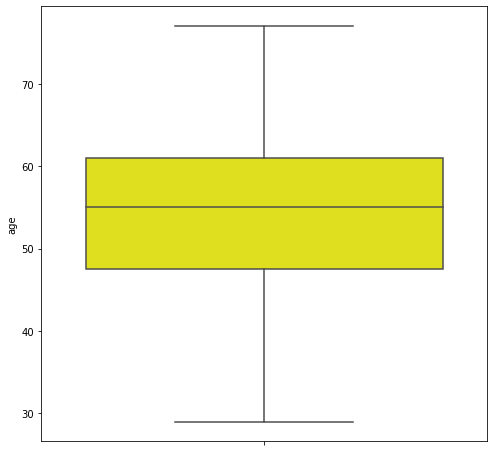

In [97]:
plt.figure(figsize = (8, 8))
sns.boxplot(data = df, y = 'age', color = 'yellow')

In [98]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Assigning values from dataset
Since we did the visualization part of the problem and understood some of the features through plots, let us know do the actual machine learning. One thing that we must be doing right now is to seperate the actual input values from the output values. 'X' is used to denote the input features that we would be giving to the machine learning model. 'y' would denote the actual output value which is the target variable. When considering 'X' below, we just remove the target feature as it is the output by using drop(). And we also should set the axis = 1 just to make sure that we are deleting the column 'target'. In additon, we are giving target feature to variable y as that is used to compare the results and also train the machine learning models. 

In [99]:
X = df.drop(['target'], axis = 1)
y = df['target']

## Dividing data using train_test_split 
We would also be using the train test split which is really handy when we want to divide the overall data into train and test values. We would be selecting about 30 percent of the values to be in the test data while the other 70 percent of the values must be considered for the test set. We have a set of random states associated with train_test_split. It would be better to make the random state to the number that could be remembered easily. It turns out that 100 is a golden number as it could be remembered in most of the cases. <br>
All in all, we have divided the input data into X_train and X_test and the output data y into y_train and y_test with a percentage of 70 for the traning data and 30 percent for the test data. 

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

## Getting the shape 
Since we have divided the data into 2 parts, we would now be testing and checking the shape of the data just to make sure that we did the right thing. It turns out that there are 212 rows for the training data and 13 features for the test data. We should also check this for the test data as it is also important. 

In [101]:
X_train.shape      #Gives the shape of the data under consideration 

(212, 13)

We would do the same for the test data and check how it was divided and the number of data points present in the test data. We see that there are 91 data points in the test data and there are 13 features. That is exactly what we want in our dataset. Therefore, train_test_split did a good job in ensuring that the values are divided according to our requirement. We would now be performing some machine learning operations on the dataset that we have considered. 

In [102]:
X_test.shape 

(91, 13)

## Creating Empty Lists 
We are creating an empty list of all the values that would be needed for plotting the barplots and comparing results. For each machine learning algorithm, we would store the output values in lists so that it would be easier later for us to do all sorts of plotting operations. 

In [103]:
accuracy_scaled = []             #This creates an empty list which would be later filled with values
f1_score_scaled = []
precision_score_scaled = []
recall_score_scaled = []
roc_auc_score_scaled = []
log_loss_scaled = []

accuracy_normalized = []
f1_score_normalized = []
precision_score_normalized = []
recall_score_normalized = []
roc_auc_score_normalized = []
log_loss_normalized = []

## Standarization and Normalization 
One of the most important operations that we must perform before we give the complete dataset to the machine learning model would be either to scale the features or normalize them so that we would not run into errors in the process. Therefore, we would be transforming the features and converting them so that it would be easier for the machine learning models to perform the machine learning operations and give us the right outputs and improve the overall performance of the model. <br>
If you are more interested to find out what standardization is, you can check out the link given here. <br>
https://builtin.com/data-science/when-and-why-standardize-your-data<br>
You can check the following website that is important for feature normalization. 
<br>https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0

In [104]:
scaler = StandardScaler()                              #Creating an instance of the StandardScaler()                    
scaler.fit(X_train)                                    #Fitting the input train values 
X_train_scaled = scaler.transform(X_train)             #Transforming the values and storing in X_train_scaled
X_test_scaled = scaler.transform(X_test)               #Transforming the values and storing in X_test_scaled

In [105]:
normalizer = Normalizer()                              #Creating an instance of the Normalizer()
normalizer.fit(X_train)                                #Fitting the input train values
X_train_normalized = normalizer.transform(X_train)     #Transforming the values and storing in X_train_normalized
X_test_normalized = normalizer.transform(X_test)       #Transforming the values and storing in X_test_normalized

## K Nearest Neighbors (KNN)
Since we have understood the data and did some operations and divided the dataset, it is now time to move to the most important part of the application which is to use machine learning algorithms for prediction. We would be using the K nearest neighbors algorithm for prediction. It is very important to understand the theory behind machine learning so that we do the hyperparameter tuning later rather than just using random values in the dataset. If you are interested to know the theory behind machine learning and k nearest neighbors, I would suggest you the website below. <br>https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/<br>
One of the hyperparameter in k nearest neighbor is the number of nearest neighbors. We have selected the value to be equal to 3 as can be seen from the cell below. <br>
What we need to do before we use the machine learning algorithm is to create an instance of it and then, we have to fit the training data values and then use predict which is later used after this cell. <br>
We have 2 types of data that we must be considering right now. The first type of data is the standardized data where the input values are standardized. On the other hand, there is some other type of data where the input features are normalized. We have to consider those values and get the predictions seperately so that we could compare at last which one was the right step for a particular machine learning model. 

In [106]:
neigh1 = KNeighborsClassifier(n_neighbors = 3)          #Creating an instance of KNeighborsClassifier()
neigh1.fit(X_train_scaled, y_train)                     #Fitting the model with X_train_scaled and y_train 
neigh2 = KNeighborsClassifier(n_neighbors = 3)          #Creating an instace of KNeighborsClassifier()
neigh2.fit(X_train_normalized, y_train)                 #Fitting the model with X_train_normalized and y_train

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Since we have already fit the values, now it is the time for us to get the predictions for the machine learning algorithms. We would store those predictions in y_test_predict_scaled and y_test_predict_normalized so that they would be used for comparison with y_test which are nothing but the actual output lables that are known by us. 

In [107]:
y_test_predict_scaled = neigh1.predict(X_test_scaled)                   #Getting the predicted output of the fit models
y_test_predict_normalized = neigh2.predict(X_test_normalized)

## Appending data to lists
In the first cell, we have used various libraries and metrics from sklearn which would give us an estimate of how well our models did on the test set. We have created empty lists before and now we would be using those and appending the results to them. We have some metrics such as accuracy score, precision score and recall score for KNN algorithm. We would now be appending the values to the lists so that they could be later visualized.  

In [108]:
accuracy_scaled.append(accuracy_score(y_test_predict_scaled, y_test))              #Appending the results with lists 
f1_score_scaled.append(f1_score(y_test_predict_scaled, y_test))
precision_score_scaled.append(precision_score(y_test_predict_scaled, y_test))
recall_score_scaled.append(recall_score(y_test_predict_scaled, y_test))
roc_auc_score_scaled.append(roc_auc_score(y_test_predict_scaled, y_test))
log_loss_scaled.append(log_loss(y_test_predict_scaled, y_test))

accuracy_normalized.append(accuracy_score(y_test_predict_normalized, y_test))
f1_score_normalized.append(f1_score(y_test_predict_normalized, y_test))
precision_score_normalized.append(precision_score(y_test_predict_normalized, y_test))
recall_score_normalized.append(recall_score(y_test_predict_normalized, y_test))
roc_auc_score_normalized.append(roc_auc_score(y_test_predict_normalized, y_test))
log_loss_normalized.append(log_loss(y_test_predict_normalized, y_test))

## Logistic Regression 
Now it is time for one of the most populuar machine learning algorithms called logistic regression. We have create 2 models clf1 and clf2 which would be later used by the machine learning models for fitting the values. We would then predict after fitting the training values. And we do the process as the above and append those values in our lists that we have created. If you are interested to know the theory behind logistic regression, here is the website that could give a good understanding of how the logistic regression works. 
<br> https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

In [109]:
clf1 = LogisticRegression(random_state = 100)
clf2 = LogisticRegression(random_state = 100)
clf1.fit(X_train_scaled, y_train)
clf2.fit(X_train_normalized, y_train)
y_test_predict_scaled = clf1.predict(X_test_scaled)
y_test_predict_normalized = clf2.predict(X_test_normalized)


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Appending data to lists 
We would now be storing the results of the metrics as we did in the previous cells. We have created those lists before and we would just append these values to them so that it becomes easier for us to visualize the plots when needed and gain a solid understanding of the machine learning solutions. 

In [110]:
accuracy_scaled.append(accuracy_score(y_test_predict_scaled, y_test))
f1_score_scaled.append(f1_score(y_test_predict_scaled, y_test))
precision_score_scaled.append(precision_score(y_test_predict_scaled, y_test))
recall_score_scaled.append(recall_score(y_test_predict_scaled, y_test))
roc_auc_score_scaled.append(roc_auc_score(y_test_predict_scaled, y_test))
log_loss_scaled.append(log_loss(y_test_predict_scaled, y_test))

accuracy_normalized.append(accuracy_score(y_test_predict_normalized, y_test))
f1_score_normalized.append(f1_score(y_test_predict_normalized, y_test))
precision_score_normalized.append(precision_score(y_test_predict_normalized, y_test))
recall_score_normalized.append(recall_score(y_test_predict_normalized, y_test))
roc_auc_score_normalized.append(roc_auc_score(y_test_predict_normalized, y_test))
log_loss_normalized.append(log_loss(y_test_predict_normalized, y_test))

## Naive Bayes Model 
The other model that we would be considering is the gaussian naive bayes machine learning model. This is one of the most useful models for machine learning. We do the processs just like the we did before. We would first fit the training dataset to the machine learning model and then, we would make some predictions so that we would be get the best output in the near future. <br> 
Here is a website that I found interesting and easy to understand where there is theory behind gaussian naive bayes machine learning model. <br>https://machinelearningmastery.com/classification-as-conditional-probability-and-the-naive-bayes-algorithm/

In [111]:
clf1 = GaussianNB()
clf2 = GaussianNB()
clf1.fit(X_train_scaled, y_train)
clf2.fit(X_train_normalized, y_train)
y_test_predict_scaled = clf1.predict(X_test_scaled)
y_test_predict_normalized = clf2.predict(X_test_normalized)

## Appending data to lists
We would append the values just like we did in the previous cells to the lists that we have created before. We would continuously append these values as they would be needed later for visualization. 

In [112]:
accuracy_scaled.append(accuracy_score(y_test_predict_scaled, y_test))
f1_score_scaled.append(f1_score(y_test_predict_scaled, y_test))
precision_score_scaled.append(precision_score(y_test_predict_scaled, y_test))
recall_score_scaled.append(recall_score(y_test_predict_scaled, y_test))
roc_auc_score_scaled.append(roc_auc_score(y_test_predict_scaled, y_test))
log_loss_scaled.append(log_loss(y_test_predict_scaled, y_test))

accuracy_normalized.append(accuracy_score(y_test_predict_normalized, y_test))
f1_score_normalized.append(f1_score(y_test_predict_normalized, y_test))
precision_score_normalized.append(precision_score(y_test_predict_normalized, y_test))
recall_score_normalized.append(recall_score(y_test_predict_normalized, y_test))
roc_auc_score_normalized.append(roc_auc_score(y_test_predict_normalized, y_test))
log_loss_normalized.append(log_loss(y_test_predict_normalized, y_test))

## Random Forest Classifier
We would be using one more machine learning algorithm called random forest classifier. This machine learning model has a few hyperparameters that must be tuned in order to get the most accurate result. I just found out that the best values that we would be using right would be the max_depth which is assigned the value 10 and random state which we would be giving the value to be 100. We would do the same thing where we first fit the model and then, we use the predict which will help us get the predictions. 
<br> 
It is good to go through the theory behind machine learning models. Here is a website that is one of the most useful ones that I found in the internet that talks about random forests in depth. <br> https://builtin.com/data-science/random-forest-algorithm

In [113]:
clf1 = RandomForestClassifier(max_depth = 10, random_state = 100)
clf2 = RandomForestClassifier(max_depth = 10, random_state = 100)
clf1.fit(X_train_scaled, y_train)
clf2.fit(X_train_normalized, y_train)
y_test_predict_scaled = clf1.predict(X_test_scaled)
y_test_predict_normalized = clf2.predict(X_test_normalized)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Appending data to lists 
We would append the values of the random forest results metrics just as we did for the previous models. We would store the values in the lists that we have created before and use them later for data visualizations. 

In [114]:
accuracy_scaled.append(accuracy_score(y_test_predict_scaled, y_test))
f1_score_scaled.append(f1_score(y_test_predict_scaled, y_test))
precision_score_scaled.append(precision_score(y_test_predict_scaled, y_test))
recall_score_scaled.append(recall_score(y_test_predict_scaled, y_test))
roc_auc_score_scaled.append(roc_auc_score(y_test_predict_scaled, y_test))
log_loss_scaled.append(log_loss(y_test_predict_scaled, y_test))

accuracy_normalized.append(accuracy_score(y_test_predict_normalized, y_test))
f1_score_normalized.append(f1_score(y_test_predict_normalized, y_test))
precision_score_normalized.append(precision_score(y_test_predict_normalized, y_test))
recall_score_normalized.append(recall_score(y_test_predict_normalized, y_test))
roc_auc_score_normalized.append(roc_auc_score(y_test_predict_normalized, y_test))
log_loss_normalized.append(log_loss(y_test_predict_normalized, y_test))

## Barplot for metrics with standardized features 
Now comes the time for the visualization that we have been waiting for after appending the values to the lists that we have created. Here, we see that there are 5 models that we have used for the predictions. We have loaded the required metrics in the lists that were created above. One thing to keep in mind is that the output of the metrics would be in the range of 0-1. 
<br> For the sake of simplicity, I multiplied those values with 100 so that the difference in the values is more apparent and could be easily spotted in the graphs that are shown below. Therefore, the y axis would be more like a percentage rather than values ranging between 0-1. We are using the barplots so that the comparison between metrics would be easily understood and interpretable. We also have legend which shows the different metrics that we have considered for the machine learning models. I have also increased the fontsize just to ensure that the results are very clear along with axis and the title. <br>
Let us now talk about the barplot that we see below. This is a barplot for the output of the machine learning models when the input values are standardized. We might get a different result for the output if the input values that we are giving to the machine learning models are normalized. Now we see from the graph that logistic regression, naive bayes and random forest classifier are the most accurate models in terms of how the model did on the test set. One thing to keep in mind, though, is that when we consider just the accuracy, there might be a possibility of machine learning model not performing well yet though it has a high accuracy. For more information regarding this, I would suggest you to check this website. <br> 
https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/<br>
ROC score is one of the useful metric for the machine learning models. Therefore, we see that Naive Bayes has a good ROC value followed by logistic regression. For the most part, out of all the values in the dataset, we see that the Naive Bayes model did the best in terms of all the metrics. That is still open to debate as we do not know what is the most important metric for the classification problem that we are solving at this point. I believe that f1 score is best when considering the robustness of the machine learning model in many machine learning applications. F1 score would actually take into consideration both the recall and the precision of the models under comparison when doing the machine learning operations. In our different machine learning models, therefore, we find that the f1 score for naive bayes model is the best. Thus, it would be good to use the naive bayes model for the prediction of chances of heart disease in a patient. 

Text(0.5, 1.0, 'Final scaled output results for machine learning models')

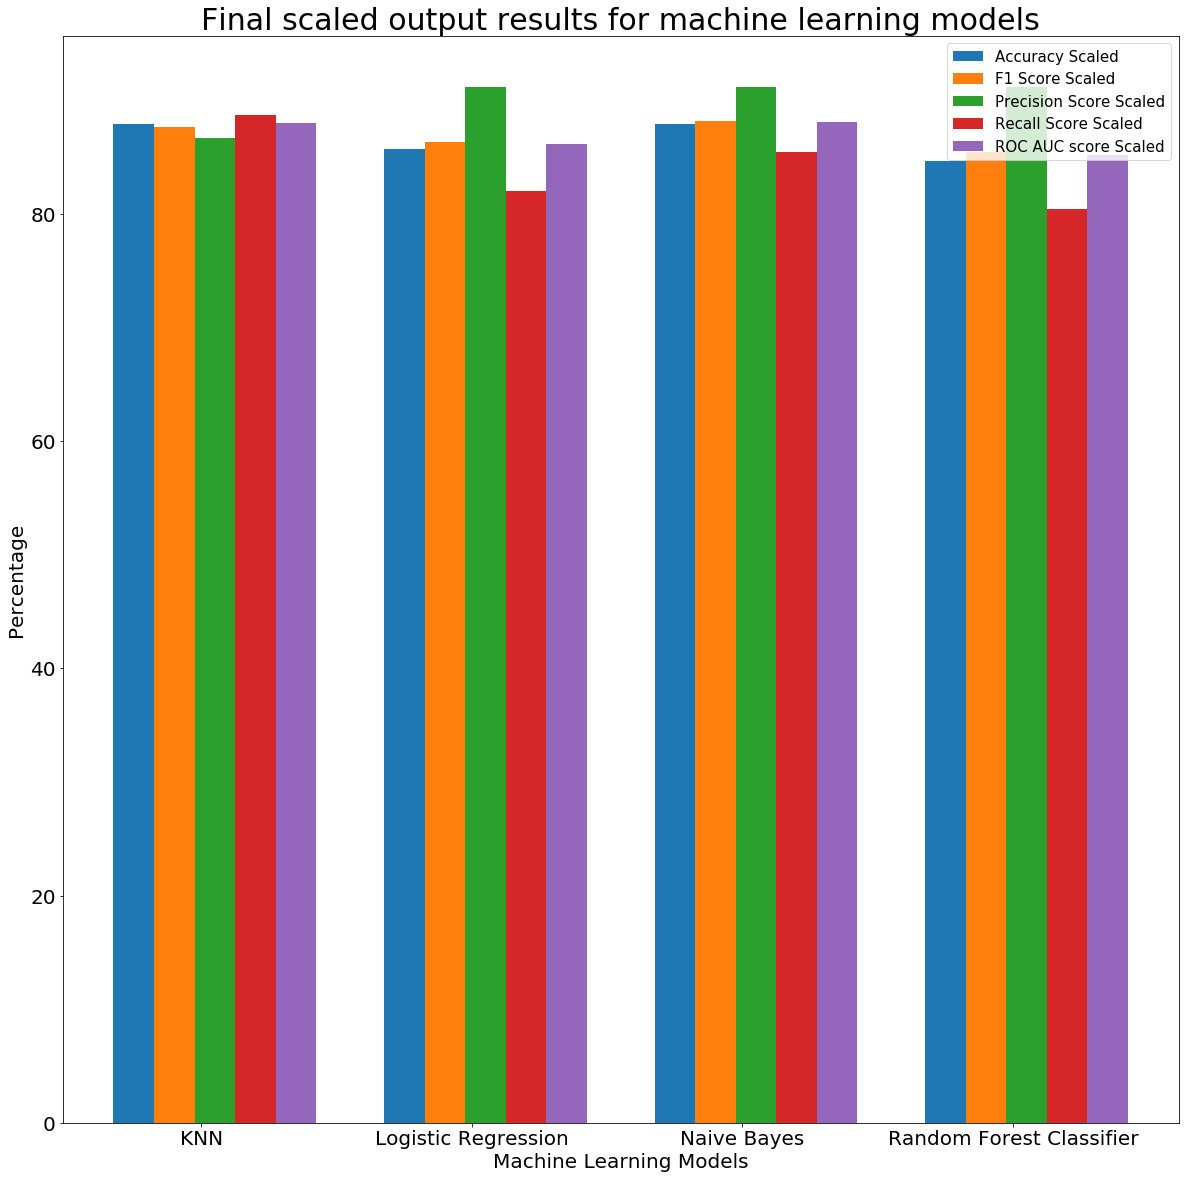

In [115]:
# knn, logisticregression, naivebayes, randomforestclassifier model values are plotted
models = ['KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest Classifier']
models = np.arange(len(models))
plt.figure(figsize = (20, 20))           #Increasing the size of the figure so that it is clear 
plt.yticks(fontsize = 20)                #Increasing the fontsize of the y axis just to make it clear
#getting a barplot between models and accurcy_scaled list and multiplying those with 100 to make it clear in graph
plt.bar(models, [i * 100 for i in accuracy_scaled], width = 0.15) 
#Performing the same operations for other lists so that we would draw them later 
plt.bar(models + 0.15, [i * 100 for i in f1_score_scaled], width = 0.15)
plt.bar(models + 0.15 * 2, [i * 100 for i in precision_score_scaled], width = 0.15)
plt.bar(models + 0.15 * 3, [i * 100 for i in recall_score_scaled], width = 0.15)
plt.bar(models + 0.15 * 4, [i * 100 for i in roc_auc_score_scaled], width = 0.15)
plt.legend(['Accuracy Scaled', 'F1 Score Scaled', 'Precision Score Scaled', 'Recall Score Scaled', 'ROC AUC score Scaled'], fontsize = 15)
plt.xticks([i + 0.25 for i in range(4)], ['KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest Classifier'], fontsize = 20)
plt.xlabel('Machine Learning Models', fontsize = 20) #Creating a label for the x-axis 
plt.ylabel('Percentage', fontsize = 20)  #Creating a label for the y-axis 
plt.title('Final scaled output results for machine learning models', fontsize = 30) #Adding a title with modified font size 


## Barplot for metrics with normalized features
We would also do the same visualization for the normalized input that we have generated previously. We would compare the results for this normalized input and plot the important machine learning metrics in the form of a bargraph. <br>
One of the things that strike out when we consider the plot below is that logistic regression has a very high precision score. <br>
What this means is that when we consider the precision, it means out of all the points that were predicted to be positive, how many values are actually positive. In our problem, we see that out of all the patients who were classified as having a heart disease, what percentage of them were rightly classified. Using logistic regression, we found the precision is about 95 percent. It turns out that the model did very well in precision and it would be a useful indicator to test whether the patient has a heart disease with a precision of about 95 percent. <br>
In general, the naive bayes machine learning model did really well in terms of the output metrics that we have considered. KNN model did not perform well as compared to the other models. Therefore, normalized values given to the KNN algorithm in our problem did not work well and it would not be wise to give a very large dataset to this machine learning model as it was not able to perform well on the small dataset. If the models perform well on a dataset that is small, it would be reasonable to assume that those models might have a upper hand when the number of data points we consider is very large or that are close the to real world datasets.  

Text(0.5, 1.0, 'Final normalized results for machine learning models')

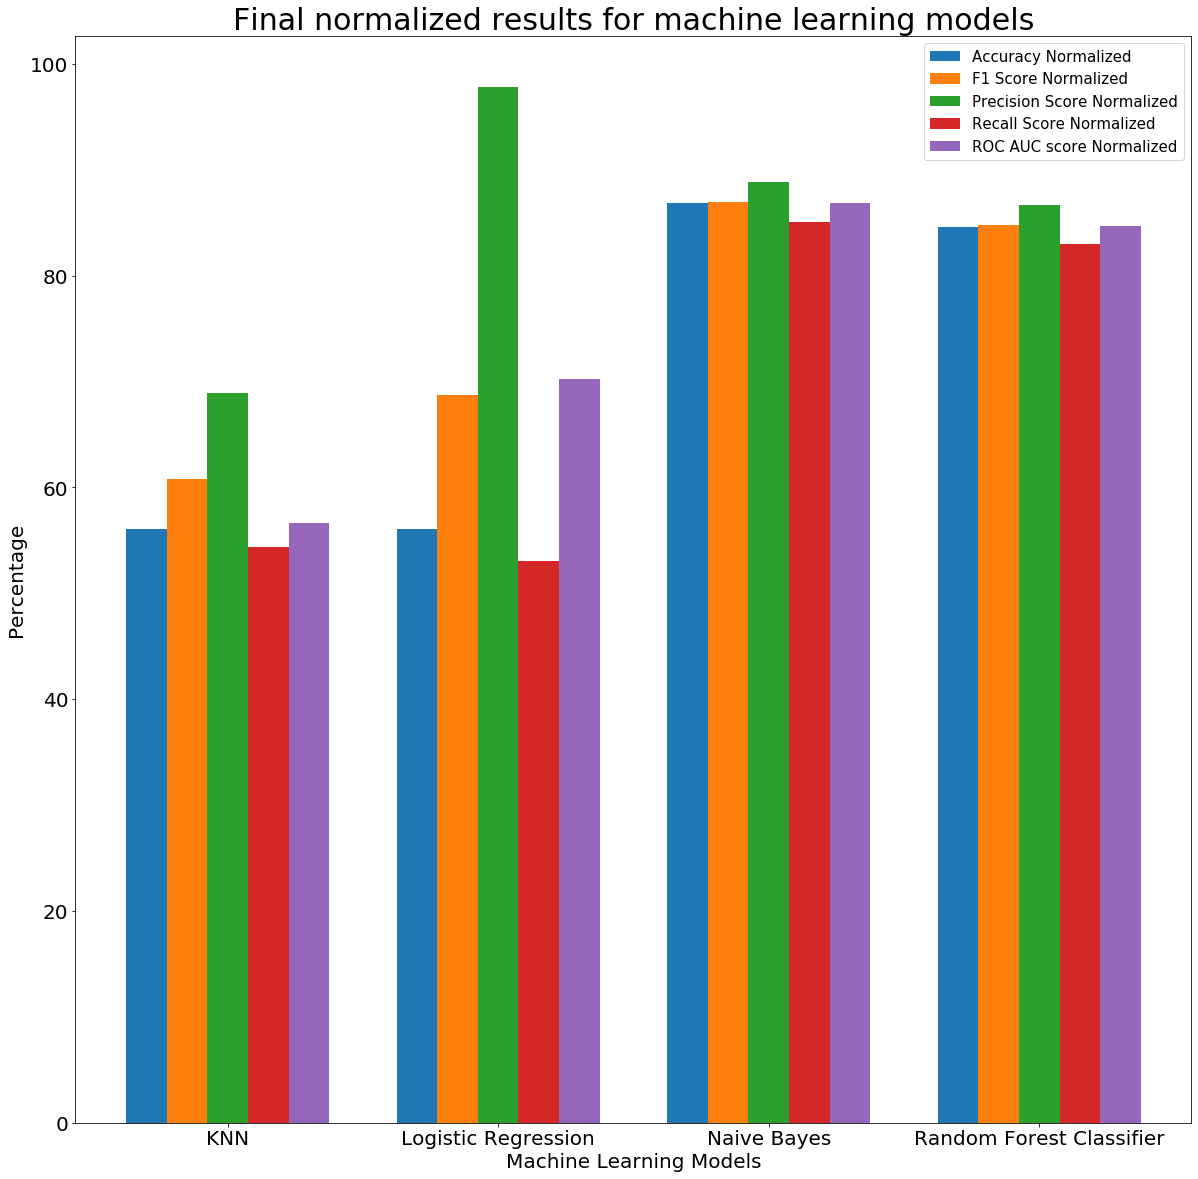

In [116]:
# knn, logisticregression, naivebayes, randomforestclassifier model values are plotted 
models = ['KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest Classifier']
models = np.arange(len(models))
plt.figure(figsize = (20, 20))
plt.yticks(fontsize = 20)
plt.bar(models, [i * 100 for i in accuracy_normalized], width = 0.15)
plt.bar(models + 0.15, [i * 100 for i in f1_score_normalized], width = 0.15)
plt.bar(models + 0.15 * 2, [i * 100 for i in precision_score_normalized], width = 0.15)
plt.bar(models + 0.15 * 3, [i * 100 for i in recall_score_normalized], width = 0.15)
plt.bar(models + 0.15 * 4, [i * 100 for i in roc_auc_score_normalized], width = 0.15)
plt.legend(['Accuracy Normalized', 'F1 Score Normalized', 'Precision Score Normalized', 'Recall Score Normalized', 'ROC AUC score Normalized'], fontsize = 15)
plt.xticks([i + 0.3 for i in range(4)], ['KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest Classifier'], fontsize = 20)
plt.xlabel('Machine Learning Models', fontsize = 20)
plt.ylabel('Percentage', fontsize = 20)
plt.title("Final normalized results for machine learning models", fontsize = 30)


## Conclusion 
1. We've learned to use the various machine learning models and compare some of the most useful metrics for different models and understand them thoroughly through bar graphs. 
2. We also learned how to read the data and perform various opeartions such as standardization and normalization. 
3. We also worked on how to print some rows in the data, understand if there are any null values and also get a solid understanding of how the data values are spread along with their percentile values and counts. 
4. We've learned to plot various machine learning plots that are important and also understood the data by using various plots and features.
5. We found that through data visualization, we could see that the rows and features of the data that we considered were typical of the actual datasets that we use in real life. 
6. We saw a good amount of correlation between a few features that are important and learned them in detail with the help of scatterplots. 